In [270]:
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [229]:
attendance = pd.read_csv("https://raw.githubusercontent.com/aalilyah/DS4a/main/DS4A/Attendence.csv")
funding = pd.read_csv("https://raw.githubusercontent.com/aalilyah/DS4a/main/DS4A/Funding.csv")
math = pd.read_csv("https://raw.githubusercontent.com/aalilyah/DS4a/main/DS4A/Math%20Test.csv")
shsat = pd.read_csv("https://raw.githubusercontent.com/aalilyah/DS4a/main/DS4A/SHSAT.csv")
quality = pd.read_csv("https://raw.githubusercontent.com/aalilyah/DS4a/main/DS4A/Quality%20Review.csv")
mode = pd.read_csv("https://raw.githubusercontent.com/aalilyah/DS4a/main/DS4A/Learning%20Mode.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [230]:
funding = funding.dropna()


In [231]:
funding = funding.rename(columns={"District ": "District", ' total_school_funding_per_pupil ':'total_school_funding_per_pupil'})
math = math.rename(columns={'Percentage_Level_3+4':"above_average"})

In [232]:
attendance['District'] = attendance['District'].astype(str)
attendance['Year'] = attendance['Year'].astype(str)
math['District'] = math['District'].astype(str)
math['Grade'] = math['Grade'].astype(str)
math['Year'] = math['Year'].astype(str)
mode['District'] = mode['District'].astype(str)
shsat['Year'] = shsat['Year'].astype(str)
shsat['District'] = shsat['District'].astype(str)
quality['District'] = quality['District'].astype(str)
quality['Year'] = quality['Year'].astype(str)
funding['District'] = funding['District'].astype(int).astype(str)
funding['Year'] = funding['Year'].astype(int).astype(str)





In [233]:
math_f = math.drop(columns=[ 'School', 'Percentage_Level_1',
       'Percentage_Level_2', 'Percentage_Level_3', 'Percentage_Level_4',])
attendance_f =  attendance.drop(columns= ['School', 'Absense Rate'])
fund_f = funding.drop(columns=['School', ' state_and_local_funding_per_pupil ', ' federal_funding _per_pupil '])
shsat_f = shsat.drop(columns= ['School', 'Count of Testers', 'Attempt Rate', 'Count of Offers'])



In [234]:
grades = pd.merge(math_f, shsat_f, on= ['DBN','Year','District'] )
atmath = pd.merge(math_f, attendance_f, on= ['DBN','Year','District'] )
atsat = pd.merge(shsat_f, attendance_f, on= ['DBN','Year','District'] )




In [250]:
shafu = pd.merge(shsat_f, fund_f, on= ['DBN','Year','District'] )
mafu = pd.merge(math_f, fund_f, on= ['DBN','Year','District'] )


In [253]:
atsat = atsat.rename(columns={'Offer Rate' : 'offer_rate','Attendence Rate' : 'attendence_rate'})
grades = grades.rename(columns={'Offer Rate' : 'offer_rate'})
atmath = atmath.rename(columns={'Attendence Rate' : 'attendence_rate'})
shafu = shafu.rename(columns={'Offer Rate' :'offer_rate'})


In [239]:
atmath['above_average'] = atmath['above_average']/100
grades['above_average'] = grades['above_average']/100
mafu['above_average'] = mafu['above_average']/100

In [274]:
attendance= attendance.rename(columns={'Attendence Rate' : 'attendence_rate'})

# **Holistic Analysis**

Later headings will be a comparative study of different variables. This is a look at how each district performs. 

In [295]:
shsat.columns

Index(['Year', 'District', 'DBN', 'School', 'Count of Testers', 'Attempt Rate',
       'Count of Offers', 'Offer Rate'],
      dtype='object')

In [290]:

grouped_data = attendance.groupby(['District', 'Year'])

attendance_rates = grouped_data['attendence_rate'].mean()

data = pd.DataFrame({'District': attendance_rates.index.get_level_values(0), 'Year': attendance_rates.index.get_level_values(1), 'attendence_rate': attendance_rates.values})

fig = px.bar(data, x='Year', y='attendence_rate', color='District', barmode='group')
fig.show()


In [294]:

grouped_data = math.groupby(['District', 'Year'])

above_average_values = grouped_data['above_average'].mean()

data = pd.DataFrame({'District': above_average_values.index.get_level_values(0), 'Year': above_average_values.index.get_level_values(1), 'above_average': above_average_values.values})

fig = px.bar(data, x='Year', y='above_average', color='District', barmode='group')
fig.show()


In [300]:
import plotly.graph_objects as go

grouped_data = shsat.groupby(['District', 'Year'])

attempt_rate_values = grouped_data['Attempt Rate'].mean()
offer_rate_values = grouped_data['Offer Rate'].mean()

data = pd.DataFrame({'District': attempt_rate_values.index.get_level_values(0), 'Year': attempt_rate_values.index.get_level_values(1), 'Attempt Rate': attempt_rate_values.values, 'Offer Rate': offer_rate_values.values})

fig = go.Figure()

for district in data['District'].unique():
  district_data = data[data['District'] == district]

  attempt_rate_trace = go.Scatter(x=district_data['Year'], y=district_data['Attempt Rate'], name=f'{district} - Attempt Rate')

  offer_rate_trace = go.Scatter(x=district_data['Year'], y=district_data['Offer Rate'], name=f'{district} - Offer Rate')

  fig.add_trace(attempt_rate_trace)
  fig.add_trace(offer_rate_trace)

fig.show()





# **The Impact of Attendence**

We are asking the question what role does attendence play in learning outcomes per each district for the purposes of this submission. 

10
                            OLS Regression Results                            
Dep. Variable:             offer_rate   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     11.58
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           0.000891
Time:                        03:15:03   Log-Likelihood:                 62.417
No. Observations:                 130   AIC:                            -120.8
Df Residuals:                     128   BIC:                            -115.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.9355      0.525  

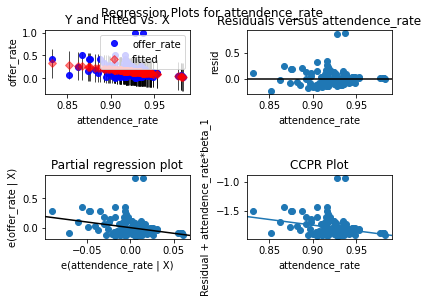

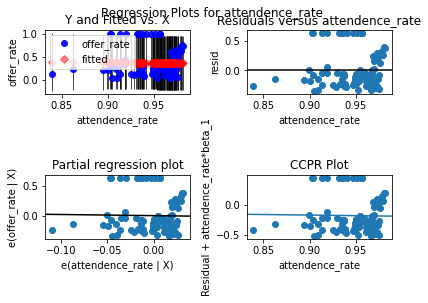

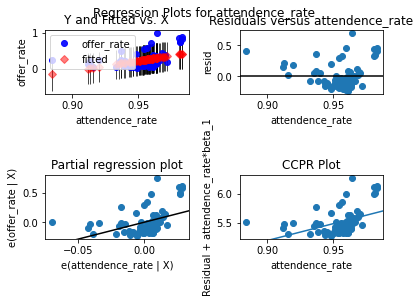

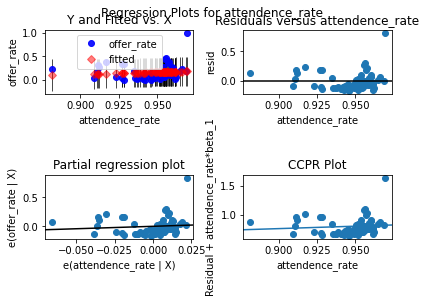

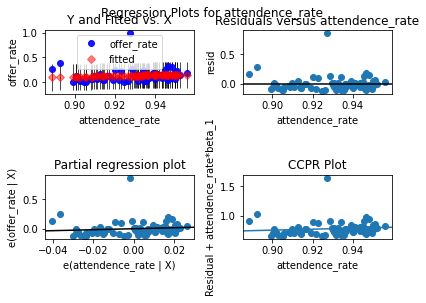

In [170]:
grouped_atsat = atsat.groupby('District')

for name, group in grouped_atsat:
  formula = 'offer_rate ~ attendence_rate'
  model = smf.ols(formula, data=group).fit()
  print(name)
  print(model.summary())
  sm.graphics.plot_regress_exog(model, 'attendence_rate')

  


10
Intercept: 1.9354538259521525
Slope: -1.9359469768236217


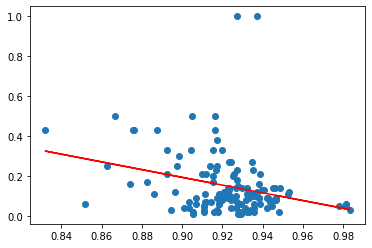

2
Intercept: 0.5515850079078446
Slope: -0.19357889754441934


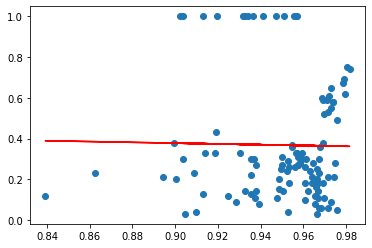

20
Intercept: -5.271636585064255
Slope: 5.777712635322895


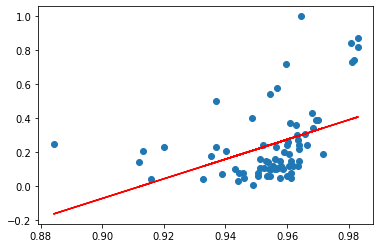

24
Intercept: -0.6362615100894868
Slope: 0.845194587541805


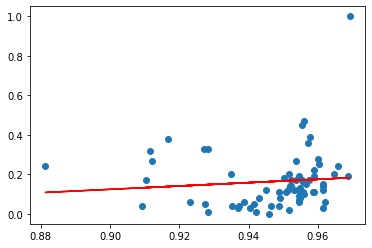

31
Intercept: -0.644490783680882
Slope: 0.8350818339398688


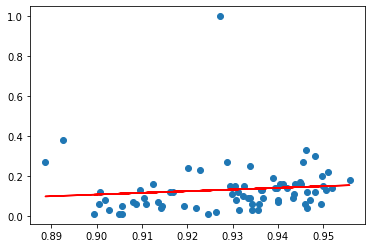

In [171]:


for name, group in grouped_atsat:
  regressor = LinearRegression()

  X = group[['attendence_rate']]
  y = group['offer_rate']
  regressor.fit(X, y)

  print(name)
  print(f'Intercept: {regressor.intercept_}')
  print(f'Slope: {regressor.coef_[0]}')

  plt.scatter(X, y)

  reg_line_func = regressor.predict

  plt.plot(X, reg_line_func(X), color='red')
  plt.show()


Looking at the the data it appears that the relationship between SHSAT and attendence varies district to district. 

10
                            OLS Regression Results                            
Dep. Variable:          above_average   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     13.38
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           0.000325
Time:                        03:15:08   Log-Likelihood:                 105.27
No. Observations:                 202   AIC:                            -206.5
Df Residuals:                     200   BIC:                            -199.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.2553      0.407  

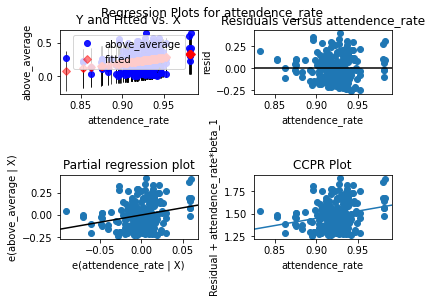

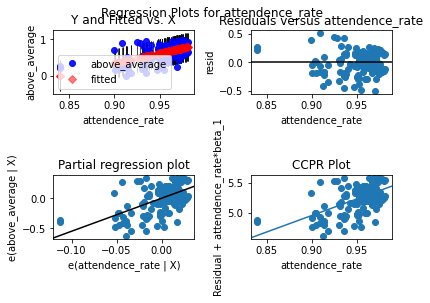

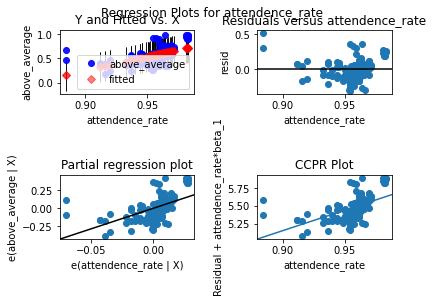

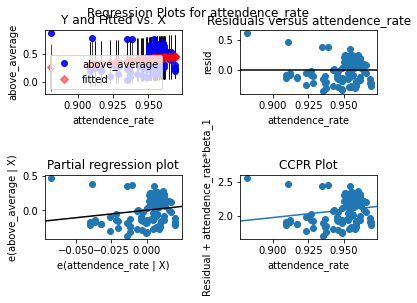

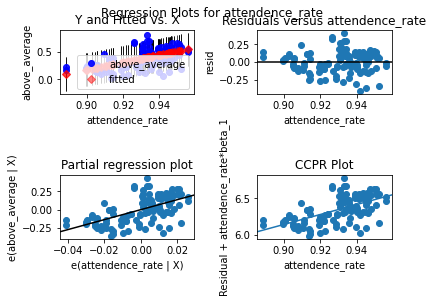

In [172]:
grouped_atmath = atmath.dropna().groupby('District')

for name, group in grouped_atmath:
  formula = 'above_average ~ attendence_rate'
  model = smf.ols(formula, data=group).fit()
  print(name)
  print(model.summary())
  sm.graphics.plot_regress_exog(model, 'attendence_rate')

10
Intercept: -1.2553374261937178
Slope: 1.6120328345860253


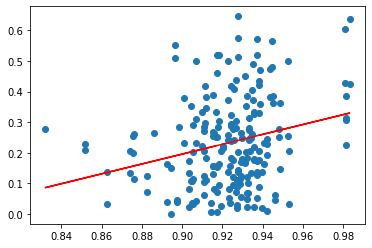

2
Intercept: -4.6138322414639905
Slope: 5.502630608703108


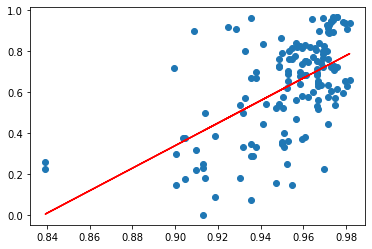

20
Intercept: -4.904748944479101
Slope: 5.726862532720473


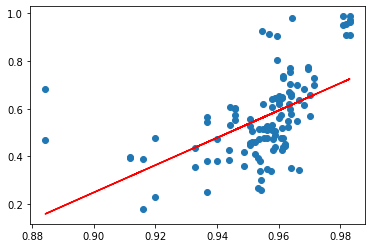

24
Intercept: -1.6768645544889824
Slope: 2.197745226040697


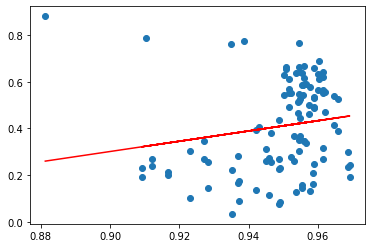

31
Intercept: -5.9702522763582575
Slope: 6.826010704569295


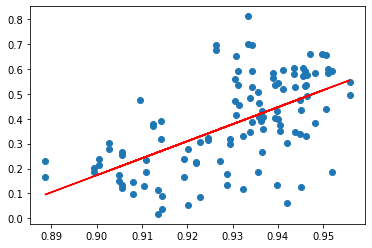

In [173]:

for name, group in grouped_atmath:
  regressor = LinearRegression()

  X = group[['attendence_rate']]
  y = group['above_average']
  regressor.fit(X, y)

  print(name)
  print(f'Intercept: {regressor.intercept_}')
  print(f'Slope: {regressor.coef_[0]}')

  plt.scatter(X, y)

  reg_line_func = regressor.predict

  plt.plot(X, reg_line_func(X), color='red')
  plt.show()

Students attendence should impact their test scores the expectation was that there would be less variance given that the Math Test are mandatory comparative to the SHSAT which are otpional. The Math test data is missing 2 years comparative to the SHSAT data which is complete. This may have played a role in the data. Only once we are able to provide interpolated grades will we have a clearer answer on this thesis. 

# **SHSAT & State Math Tests**
Does positive performance in one indicate positive performance in the other?

10
                            OLS Regression Results                            
Dep. Variable:             offer_rate   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     6.234
Date:                Sun, 08 Jan 2023   Prob (F-statistic):             0.0133
Time:                        03:15:24   Log-Likelihood:                 88.194
No. Observations:                 202   AIC:                            -172.4
Df Residuals:                     200   BIC:                            -165.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1827      0.021      8.

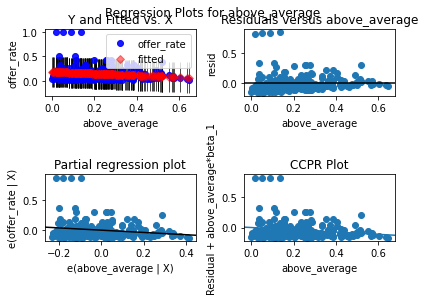

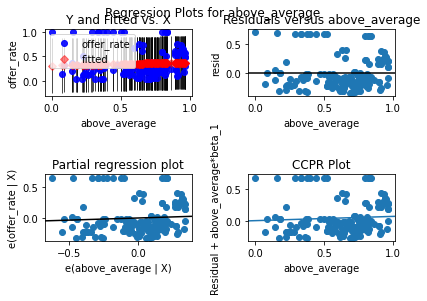

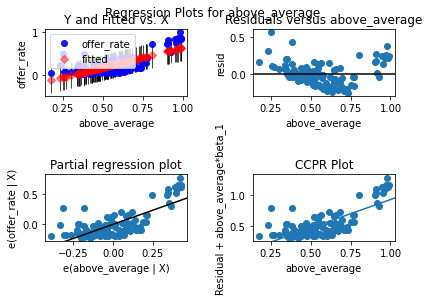

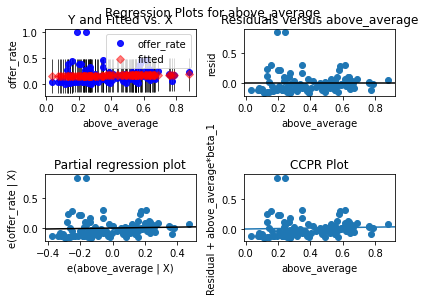

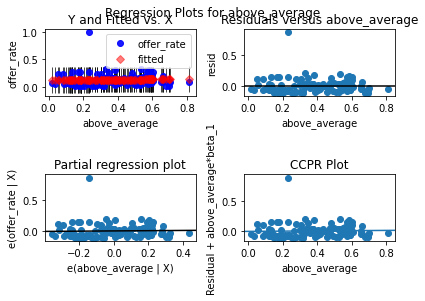

In [174]:
grouped_grades = grades.dropna().groupby('District')

for name, group in grouped_grades:
  formula = 'offer_rate ~ above_average'
  model = smf.ols(formula, data=group).fit()
  print(name)
  print(model.summary())
  sm.graphics.plot_regress_exog(model, 'above_average')



10
Intercept: 0.18271435232076377
Slope: -0.18599644896435338


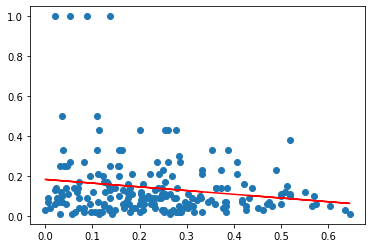

2
Intercept: 0.30909423697782046
Slope: 0.06833180003758381


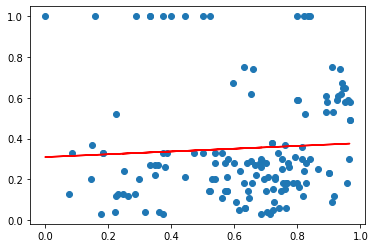

20
Intercept: -0.288109263027194
Slope: 0.9275946907326866


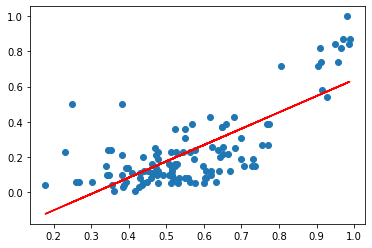

24
Intercept: 0.1501851542311236
Slope: 0.03842626637552367


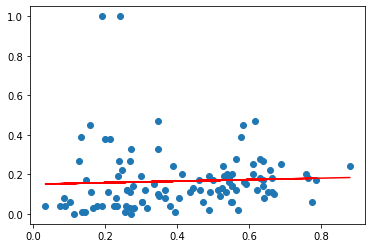

31
Intercept: 0.11976638040605772
Slope: 0.019879254388883123


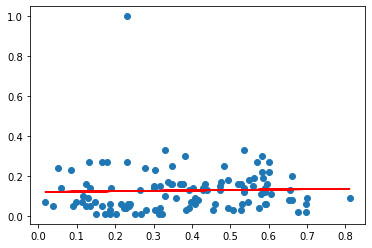

In [175]:
for name, group in grouped_grades:
  regressor = LinearRegression()

  X = group[['above_average']]
  y = group['offer_rate']
  regressor.fit(X, y)

  print(name)
  print(f'Intercept: {regressor.intercept_}')
  print(f'Slope: {regressor.coef_[0]}')

  plt.scatter(X, y)

  reg_line_func = regressor.predict

  plt.plot(X, reg_line_func(X), color='red')
  plt.show()

In [176]:
grades = grades.dropna()

Intercept: 0.35031693515709106
Slope: 0.3631556643630419


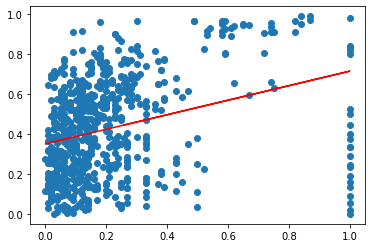

In [177]:
regressor = LinearRegression()
X = grades[['offer_rate']]
y = grades['above_average']
regressor.fit(X, y)
print(f'Intercept: {regressor.intercept_}')
print(f'Slope: {regressor.coef_[0]}')
plt.scatter(X, y)
reg_line_func = regressor.predict
plt.plot(X, reg_line_func(X), color='red')
plt.show()



There are too many outliers to tell confidently wether there is a relationship between the SHSAT and the State Math test. It skews positive on a whole but varies district to district with district 20 showing the most correlation between the two. 


# **The Role of Money**

10
                            OLS Regression Results                            
Dep. Variable:             offer_rate   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.560
Date:                Sun, 08 Jan 2023   Prob (F-statistic):              0.112
Time:                        03:47:11   Log-Likelihood:                 58.075
No. Observations:                 130   AIC:                            -112.2
Df Residuals:                     128   BIC:                            -106.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept

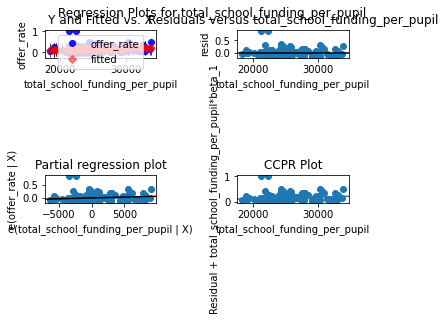

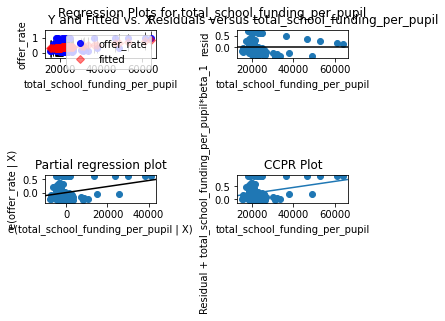

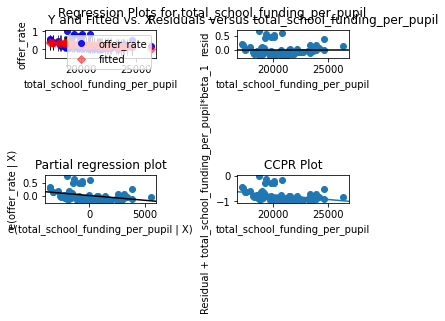

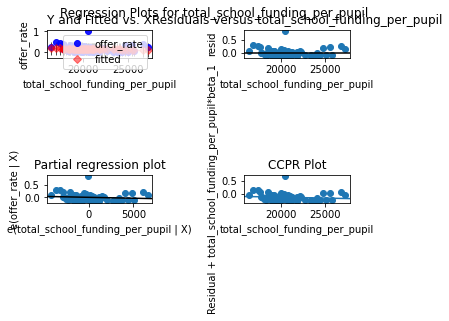

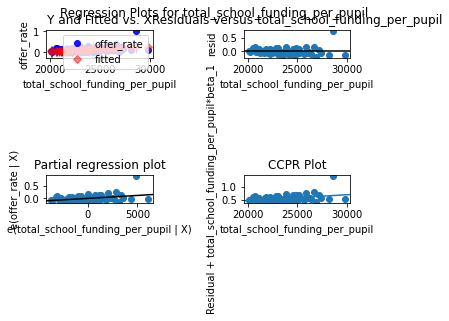

In [257]:
grouped_shafu = shafu.groupby('District')

for name, group in grouped_shafu:
  formula = 'offer_rate ~ total_school_funding_per_pupil'
  model = smf.ols(formula, data=group).fit()
  print(name)
  print(model.summary())
  sm.graphics.plot_regress_exog(model, 'total_school_funding_per_pupil')


10
Intercept: -0.009546213275401283
Slope: 6.418455904406544e-06


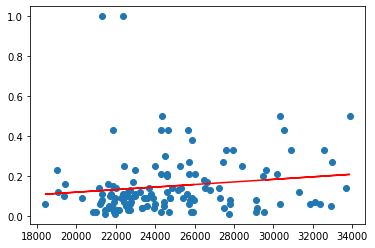

2
Intercept: 0.10791445120775472
Slope: 1.1490886380430166e-05


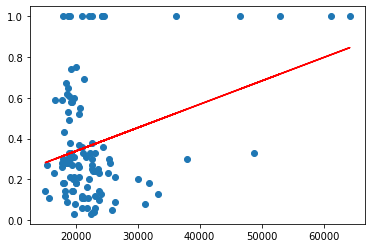

20
Intercept: 1.0121248270180236
Slope: -3.702062769011764e-05


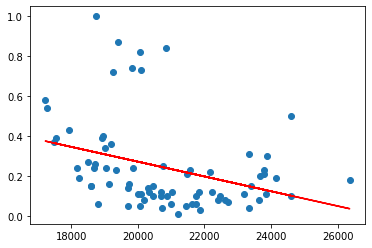

24
Intercept: 0.3108043266591928
Slope: -7.089665559093172e-06


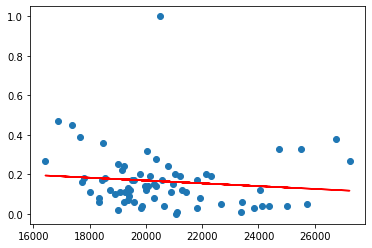

31
Intercept: -0.4121146410384641
Slope: 2.287726171557101e-05


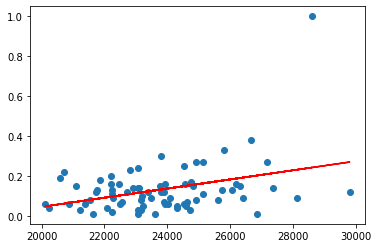

In [258]:
for name, group in grouped_shafu:
  regressor = LinearRegression()

  X = group[['total_school_funding_per_pupil']]
  y = group['offer_rate']
  regressor.fit(X, y)

  print(name)
  print(f'Intercept: {regressor.intercept_}')
  print(f'Slope: {regressor.coef_[0]}')

  plt.scatter(X, y)

  reg_line_func = regressor.predict

  plt.plot(X, reg_line_func(X), color='red')
  plt.show()

10
                            OLS Regression Results                            
Dep. Variable:          above_average   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     20.47
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           9.43e-06
Time:                        03:49:07   Log-Likelihood:                -1001.8
No. Observations:                 247   AIC:                             2008.
Df Residuals:                     245   BIC:                             2015.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept

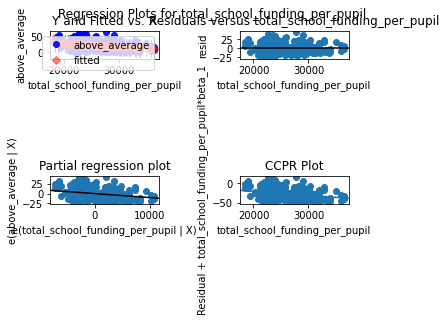

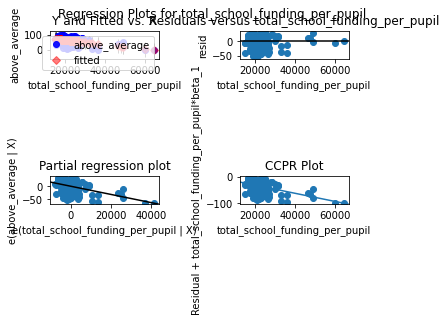

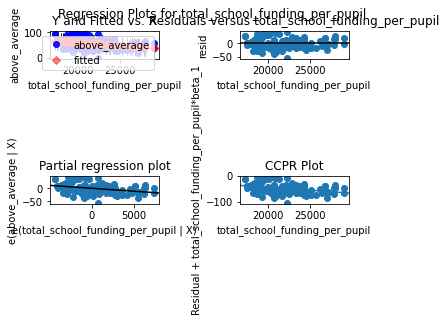

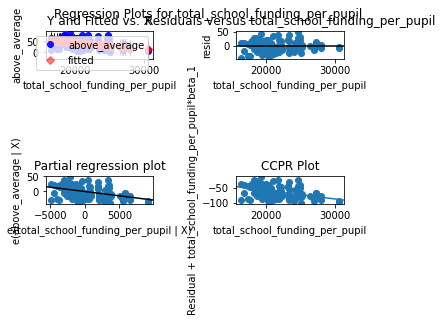

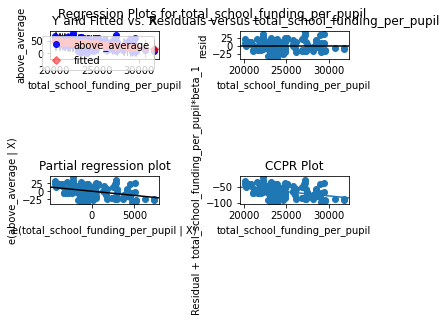

In [262]:
grouped_mafu = mafu.dropna().groupby('District')

for name, group in grouped_mafu:
  formula = 'above_average ~ total_school_funding_per_pupil'
  model = smf.ols(formula, data=group).fit()
  print(name)
  print(model.summary())
  sm.graphics.plot_regress_exog(model, 'total_school_funding_per_pupil')

10
Intercept: 48.70157913038119
Slope: -0.001014964111983829


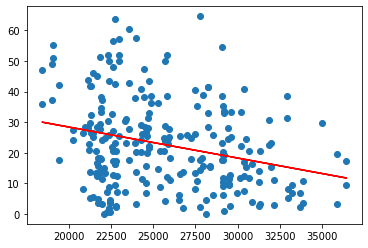

2
Intercept: 97.61154404321587
Slope: -0.0015601239934394885


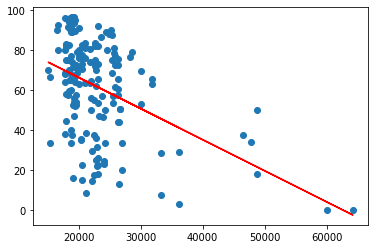

20
Intercept: 103.53265854307395
Slope: -0.0022337194295451624


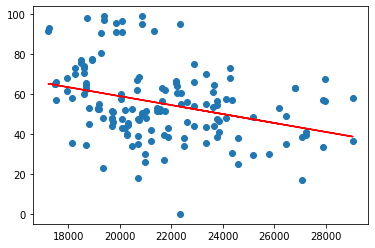

24
Intercept: 101.55714605650408
Slope: -0.0028777683625724267


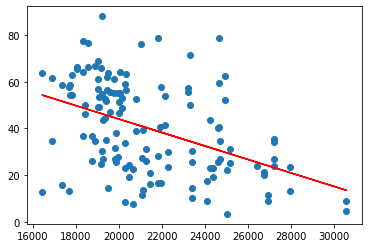

31
Intercept: 101.18329539380767
Slope: -0.002624059376601346


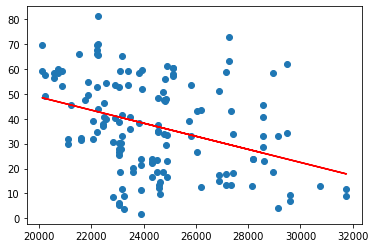

In [263]:
for name, group in grouped_mafu:
  regressor = LinearRegression()

  X = group[['total_school_funding_per_pupil']]
  y = group['above_average']
  regressor.fit(X, y)

  print(name)
  print(f'Intercept: {regressor.intercept_}')
  print(f'Slope: {regressor.coef_[0]}')

  plt.scatter(X, y)

  reg_line_func = regressor.predict

  plt.plot(X, reg_line_func(X), color='red')
  plt.show()

Intercept: 27003.95814020548
Slope: -84.02481431299967


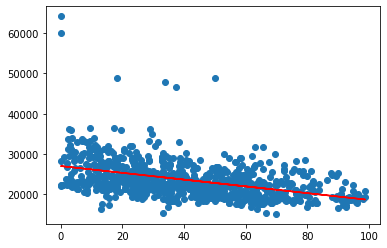

In [267]:
mafu = mafu.dropna()

regressor = LinearRegression()
X = mafu[['above_average']]
y = mafu[ 'total_school_funding_per_pupil']
regressor.fit(X, y)
print(f'Intercept: {regressor.intercept_}')
print(f'Slope: {regressor.coef_[0]}')
plt.scatter(X, y)
reg_line_func = regressor.predict
plt.plot(X, reg_line_func(X), color='red')
plt.show()

There have been several articles such as [this one ](https://nypost.com/2022/01/30/new-york-keeps-spending-more-on-schools-and-getting-less-results/) which documents the role of money in New York Education. The expectation was negative slopes but not to this degree. This trend remains consistent regardless of the district.

In [268]:
quality.columns

Index(['District', 'DBN', 'School', 'Year', 'Start_Date', 'Indicator_1.1',
       'Indicator_1.2', 'Indicator_1.3', 'Indicator_1.4', 'Indicator_4.1',
       'Indicator_4.2'],
      dtype='object')

# **School Quality Reviews**
School Quality Reviews are what the DOE thinks of the schools. We broke this up into six Indicators

Indicator_1.1 Curriculum
Indicator_1.2 Pedagogy
Indicator_1.3 Leveraging Resources
Indicator_1.4 Positive Learning Environment
Indicator_4.1 Teacher Support and Supervision
Indicator_4.2 Teacher Teams and Leadership Development
Range of possible values: U/UD, D, P, WD, 
U/UD = Underdeveloped 
D = Developing
P = Proficient
WD = Well Developed

What is interesting however is that despite the performance of the schools by every other metric being poor no one recieved a U/UD

